## Prep

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install hampel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hampel: filename=hampel-1.0.2-cp310-cp310-linux_x86_64.whl size=208983 sha256=12cd3d52fbec87a69d736e4b1549e8edde57b785c3c93bf7b69679e22a877ee3
  Stored in directory: /root/.cache/pip/wheels/0e/c3/3c/8a9f55c3de0b09faf919393d4c6f09b11b7421dcaa7243b820
Successfully built hampel


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
from scipy.signal import savgol_filter
from hampel import hampel

In [8]:
folder_path = '/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/1_Processed/CSI_Amplitudes/2024-09-28'

# List all files in the folder
file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
dfs = []
for file_name in file_list:
    match = re.search(r"csi-amp-sess01-(\d+)", file_name)
    if match:
      print(file_name)
      file_path = os.path.join(folder_path, file_name)
      df = pd.read_csv(file_path)
      dfs.append(df)
print(len(dfs))

csi-amp-sess01-0.csv
csi-amp-sess01-1.csv
csi-amp-sess01-2.csv
csi-amp-sess01-3.csv
csi-amp-sess01-4.csv
csi-amp-sess01-5.csv
6


In [9]:
for df in dfs:
  print(df.shape)

(17992, 52)
(16082, 52)
(15851, 52)
(15676, 52)
(15616, 52)
(13528, 52)


## Denoise

In [33]:
filtered_dfs = []
for df in dfs:
  filtered_data = pd.DataFrame()
  for col in df.columns:
        col_series = df[col]
        # Hampel filter
        hampel_filtered = hampel(col_series, window_size=20, n_sigma=1.8)
        # Savitzky-Golay filter
        sg_filtered = savgol_filter(hampel_filtered.filtered_data, window_length=20, polyorder=2)
        filtered_data[col] = sg_filtered
  filtered_dfs.append(filtered_data)

In [30]:
print(hampel_filtered.thresholds)

[ 8.4295408e-26  4.5215698e-41  8.4295408e-26 ...  2.7731769e+00
 -4.6094340e-07  2.7642293e+00]


In [31]:
for df in filtered_dfs:
  print(df.shape)

(17992, 52)
(16082, 52)
(15851, 52)
(15676, 52)
(15616, 52)
(13528, 52)


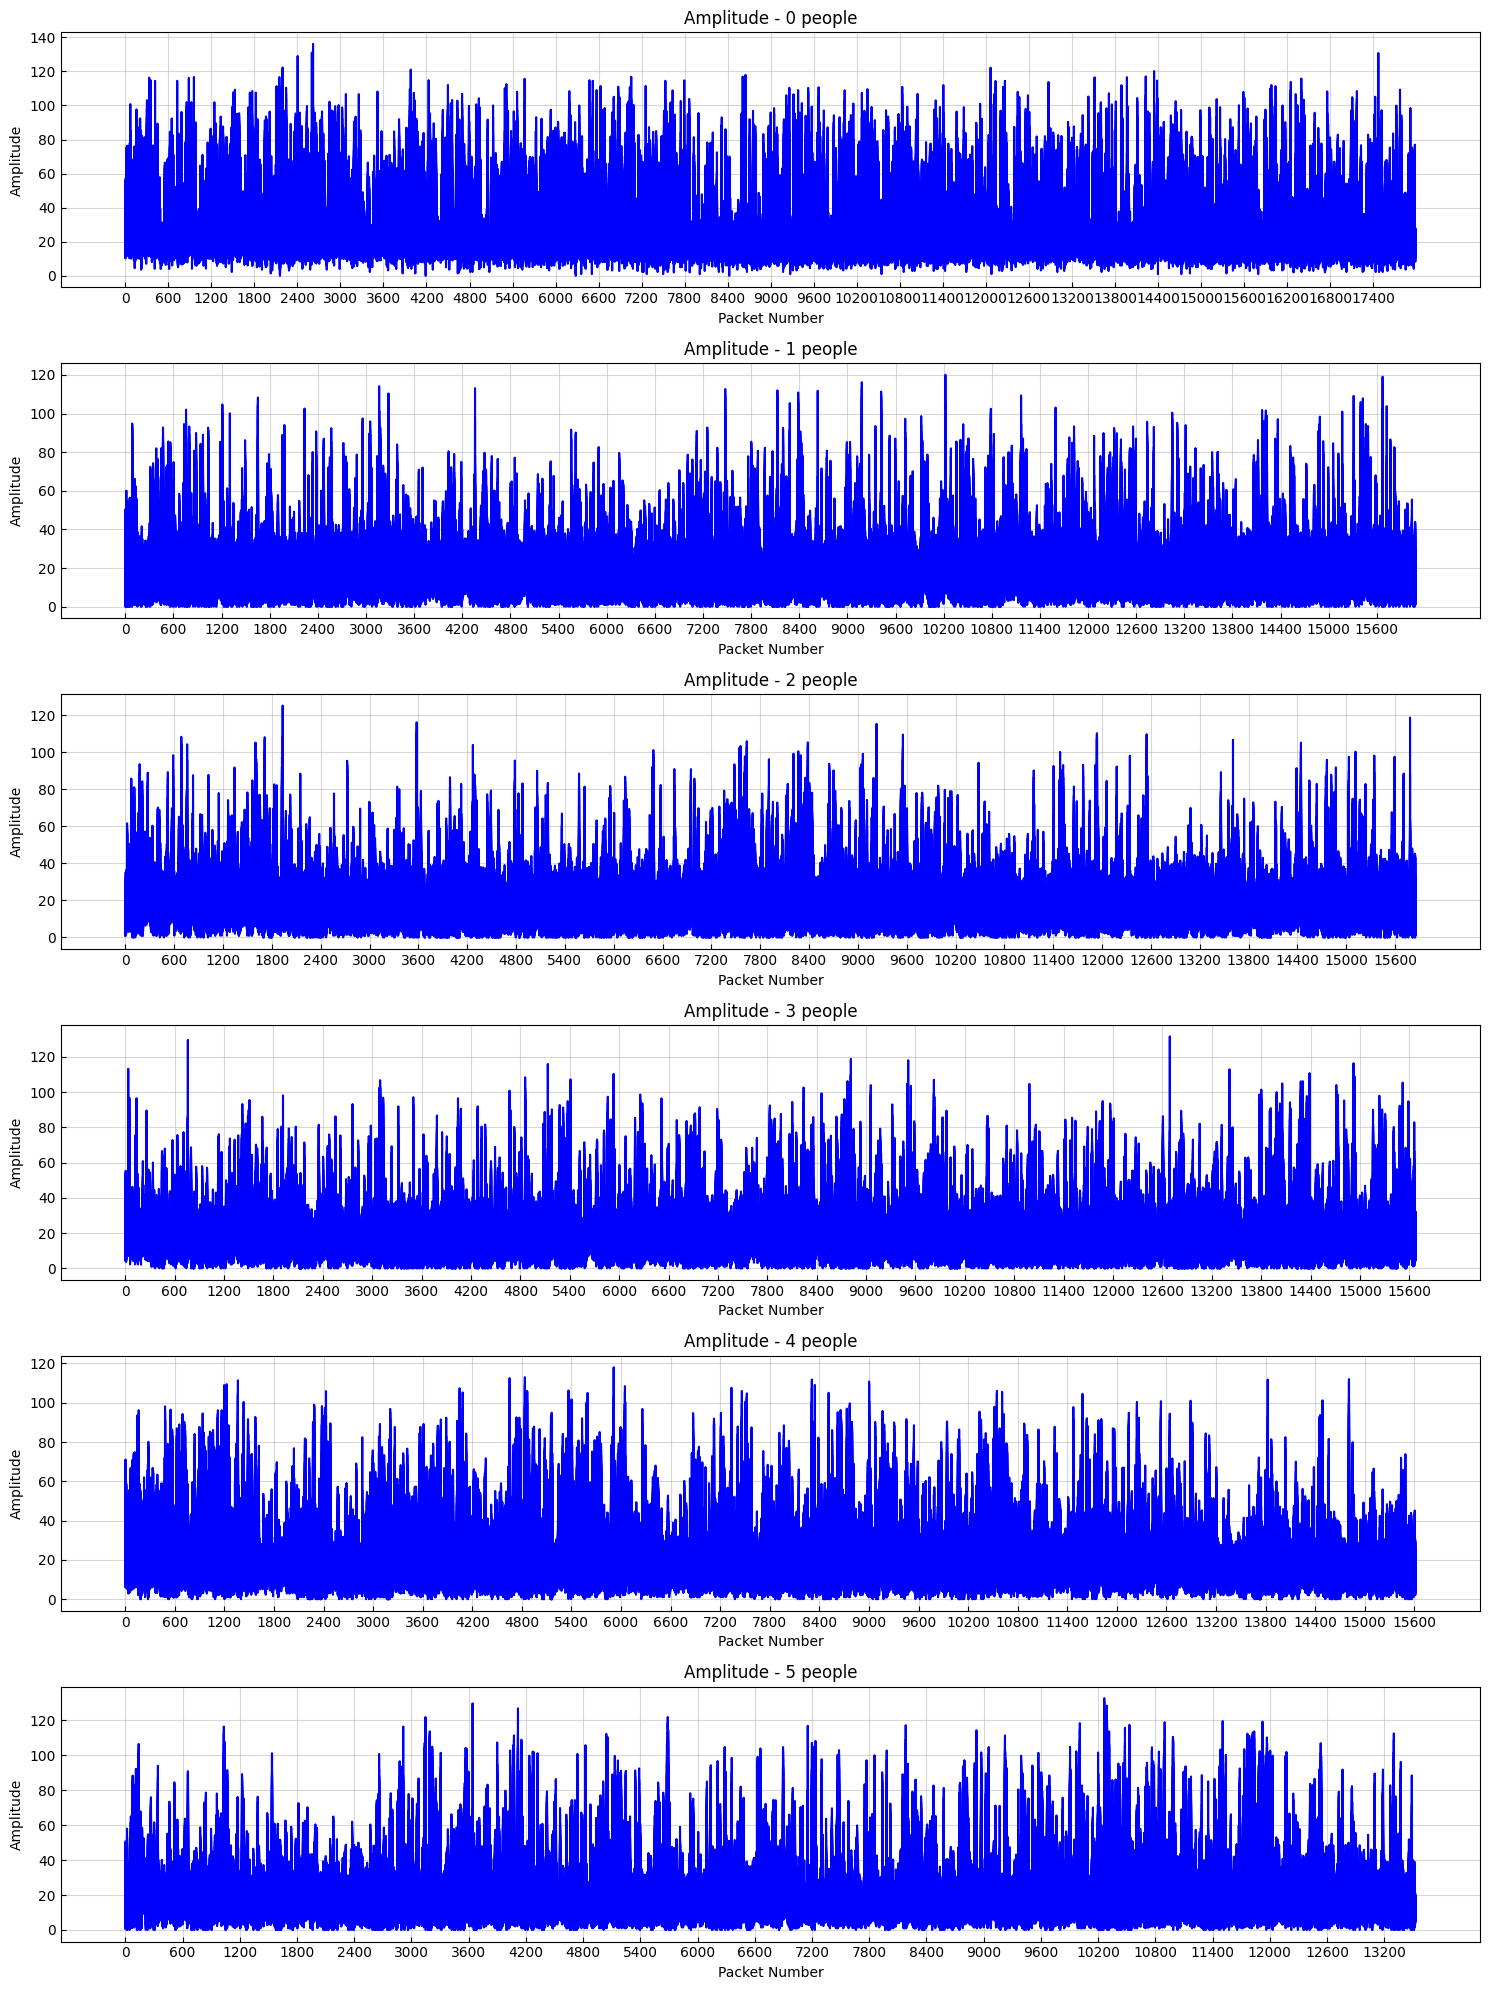

In [27]:
plt.style.use('default')

fig, ax = plt.subplots(len(dfs), 1)
index = 0
for x in dfs:
    amp_x = [i for i in range(dfs[index].shape[0])]
    ax[index].plot(amp_x, dfs[index],color='blue')
    ax[index].set(xlabel='Packet Number', ylabel='Amplitude',
       title=f'Amplitude - {index} people')
    ax[index].grid()
    ax[index].tick_params(direction='in', grid_alpha=0.5)
    ax[index].set_xticks(np.arange(0, len(amp_x)+1, 600))
    index += 1

fig.set_figheight(20)
fig.set_figwidth(15)

plt.tight_layout()
plt.show()


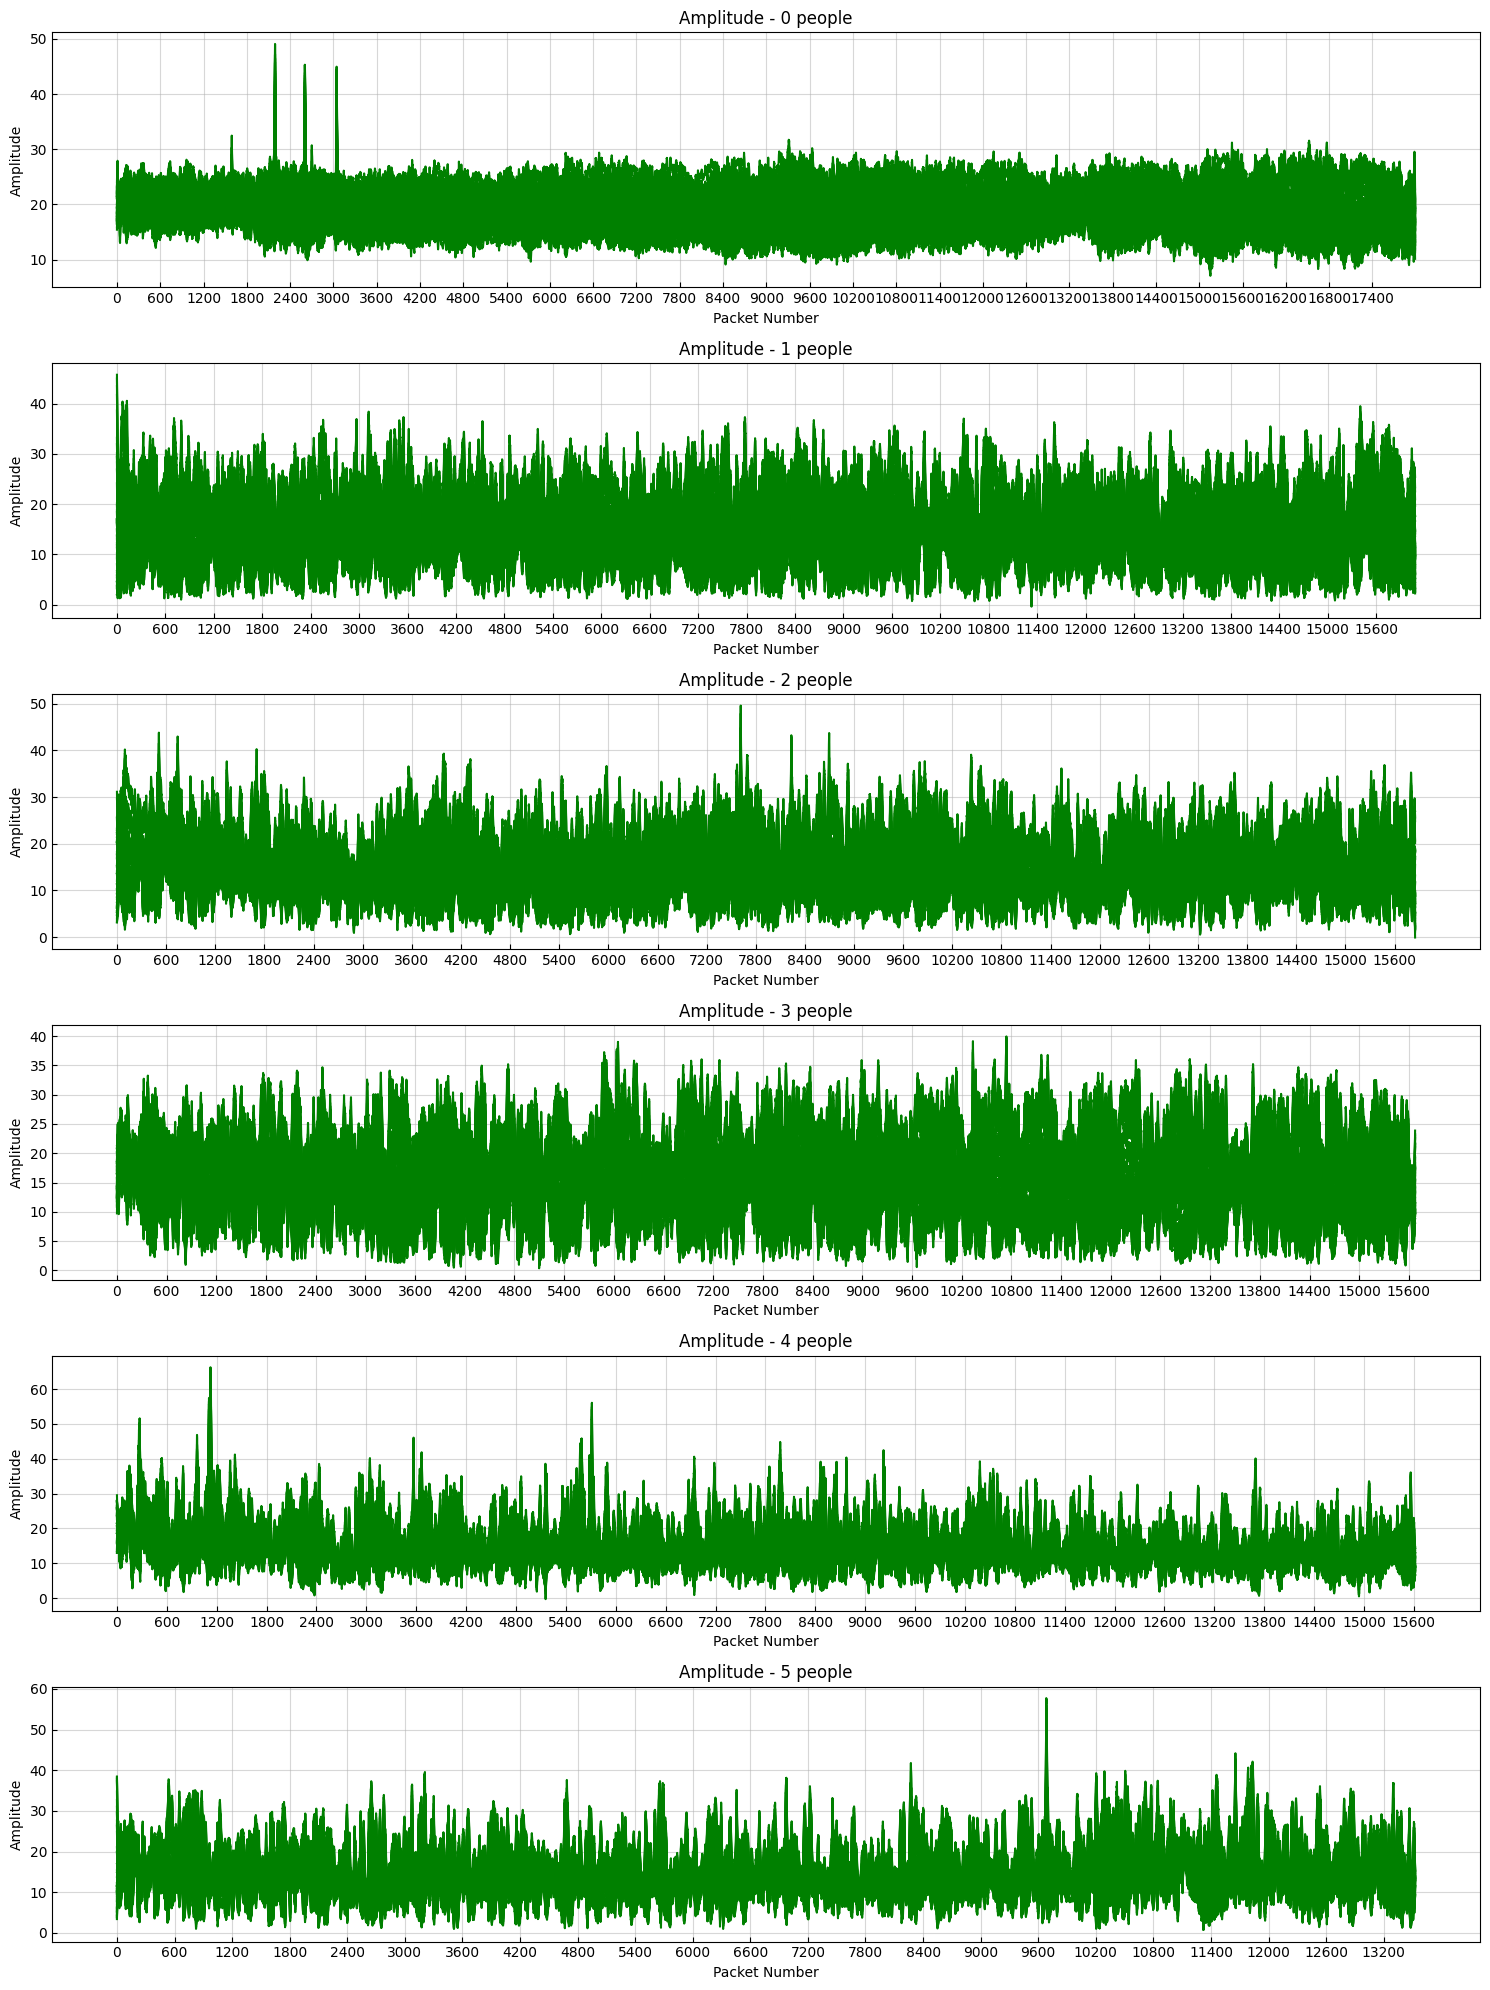

In [34]:
plt.style.use('default')

fig, ax = plt.subplots(len(filtered_dfs), 1)
index = 0
for x in filtered_dfs:
    amp_x = [i for i in range(filtered_dfs[index].shape[0])]
    ax[index].plot(amp_x, filtered_dfs[index],color='green')
    ax[index].set(xlabel='Packet Number', ylabel='Amplitude',
       title=f'Amplitude - {index} people')
    ax[index].grid()
    ax[index].tick_params(direction='in', grid_alpha=0.5)
    ax[index].set_xticks(np.arange(0, len(amp_x)+1, 600))
    index += 1

fig.set_figheight(20)
fig.set_figwidth(15)

plt.tight_layout()
plt.show()


In [35]:
index = 0
for x in filtered_dfs:
  df = pd.DataFrame(x, index=None)
  df.to_csv(f"/content/drive/MyDrive/UIT/UIT_Graduation_Thesis/Dataset/1_Processed/CSI_Filtered_Amp/csi-filtered-1811-d1-sess01-{index}.csv",index=False)
  index += 1